In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import svm, datasets
import pandas as pd 

#iris = datasets.load_iris()
df = pd.read_csv("base_proyecto.csv", sep = ",", index_col=0)

In [2]:

"""
    solo tomamos las primeras 2 caracteristicas 
"""
aux_EDAD = np.array(df["grupos_de_edad"]).reshape(9450, 1)
aux_ingresos = np.array(df["ingresos"]).reshape(9450, 1)
X = np.column_stack((aux_EDAD,aux_ingresos))
aux = X[:150]
aux

y = np.array(df["pobreza_binaria"])
aux_y= y[:150]
h = 0.2 
c = 1.0
#svm LINEAL 
svc = svm.SVC(kernel= "linear", C=c).fit(aux,aux_y)

print( "kernal linear=",svc)




kernal linear= SVC(kernel='linear')


In [3]:
rbf_svc = svm.SVC(kernel= "rbf", C=c, gamma=0.7).fit(aux,aux_y)

rbf_svc

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,0.7
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [4]:
poly_svc = svm.SVC(kernel = "poly", degree = 3, C=c).fit(aux,aux_y)
print("kernal poly:", poly_svc)
lin_svc = svm.LinearSVC(C=c).fit(aux,aux_y)

kernal poly: SVC(kernel='poly')


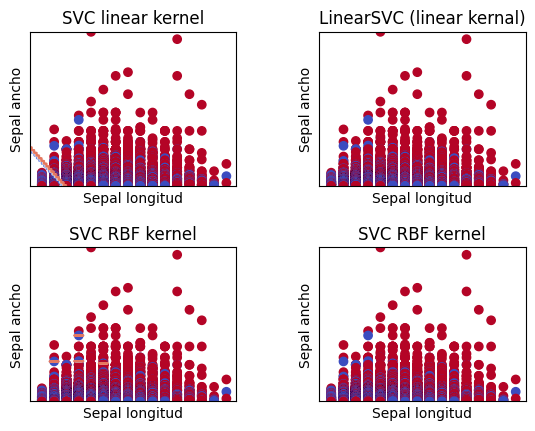

In [5]:
x_min, x_max = X[:,0].min() -1, X[:,0].max() +1

y_min, y_max = X[:,1].min() -1, X[:,1].max() +1

xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max))

titles = ["SVC linear kernel",
          "LinearSVC (linear kernal)",
          "SVC RBF kernel",
          "SVC RBF kernel",
          "SVC polynominal"]
for i, clf in enumerate((svc,lin_svc, rbf_svc, poly_svc)):
    #Realizando el gráfico
    #Se le asigna uncoloc a cada punto
    plt.subplot(2,2, i + 1)
    plt.subplots_adjust(wspace = 0.4, hspace = 0.4)
    #prediccion en base un modelo
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    #colocar el resultado dentro d eunrepositorio
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                cmap= plt.cm.coolwarm, alpha = 0.8)
    #Graficando también los utnso d datos
    plt.scatter(X[:,0], X[:,1],
                c = y, cmap = plt.cm.coolwarm)
    plt.xlabel("Sepal longitud")
    plt.ylabel("Sepal ancho")
    plt.xlim( xx.min(), xx.max())
    plt.ylim( yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])



In [ ]:
plt.show()s